In [1]:
# Let's import our dependencies. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

ImportError: DLL load failed while importing _ufuncs: The specified procedure could not be found.

In [3]:
# read API.csv and miami_data_enriched.csv

api_miami_df = pd.read_csv('miami_merged_data_with_API.csv')

enriched_miami_df = pd.read_csv('miami_data_enriched.csv')

In [4]:
api_miami_df.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,...,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality,post_code,school count,hosp count,rest count
0,25.664650,-80.454970,3059080100500,391000.0,7096,3181,1280,7864.9,52246.5,41626.8,...,47379.1,22018.5,22,0,3,4,33196,2.0,1.0,0.0
1,25.851443,-80.175251,132080090270,420000.0,5555,1565,0,4070.8,18512.6,326.1,...,26516.6,10578.8,21,0,8,4,33138,6.0,6.0,10.0
2,25.539853,-80.386774,3069240001921,360000.0,46871,2400,194,11110.2,18526.1,10559.4,...,59032.3,3600.5,17,0,6,4,33032,0.0,0.0,0.0
3,25.821264,-80.380662,3530190022210,465000.0,4151,2253,3309,8771.4,57951.2,20335.1,...,47818.3,1899.8,19,0,4,5,33178,2.0,0.0,0.0
4,25.916466,-80.171423,722170181250,245000.0,4500,1318,1562,3212.8,16424.2,2745.2,...,47633.0,10676.0,21,0,12,4,33162,7.0,3.0,0.0


In [5]:
# enriched_miami_df.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality,post_code
0,25.664650,-80.454970,3059080100500,391000.0,7096,3181,1280,7864.9,52246.5,41626.8,95417.8,47379.1,22018.5,22,0,3,4,33196
1,25.851443,-80.175251,132080090270,420000.0,5555,1565,0,4070.8,18512.6,326.1,27723.2,26516.6,10578.8,21,0,8,4,33138
2,25.539853,-80.386774,3069240001921,360000.0,46871,2400,194,11110.2,18526.1,10559.4,107067.5,59032.3,3600.5,17,0,6,4,33032
3,25.821264,-80.380662,3530190022210,465000.0,4151,2253,3309,8771.4,57951.2,20335.1,63908.4,47818.3,1899.8,19,0,4,5,33178
4,25.916466,-80.171423,722170181250,245000.0,4500,1318,1562,3212.8,16424.2,2745.2,51242.3,47633.0,10676.0,21,0,12,4,33162


In [ ]:
# merge the 2 dataframes to the final dataframe
# final_df = pd.merge(api_miami_df, enriched_miami_df, on=["LATITUDE","LONGITUDE"])
# final_df

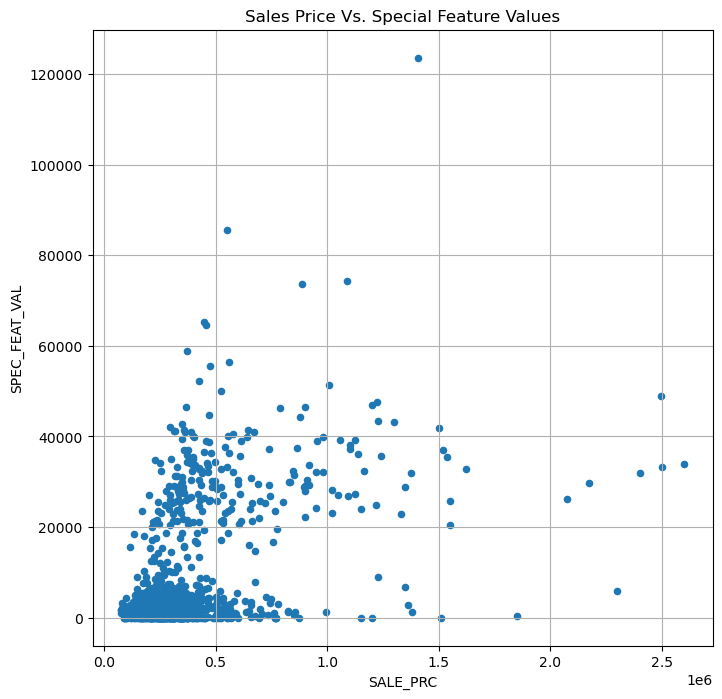

NameError: name 'linregress' is not defined

In [11]:
# sales price vs. special features

api_miami_df.plot(kind="scatter", x="SALE_PRC", y="SPEC_FEAT_VAL", grid=True, figsize=(8,8),
              title="Sales Price Vs. Special Feature Values")
plt.show()


# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(api_miami_df["SALE_PRC"], api_miami_df["SPEC_FEAT_VAL"])
print(rvalue)

# pearson's r is -1<= r <= 1
# -1 indicates perfect negative correlation
# 1 indicates perfect positive correlation
# |r| < 0.3 none or very weak
# 0.3 <= |r| < 0.5 weak
# 0.5 <= |r| < 0.7 moderate
# |r| >= 0.7 strong


## Sales Price vs. Special Feature Value

Alernate hypothesis: the higher the special feature value on the home, the higher the sales price.
Null hypothesis: the higher the special feature value on the home, the lower the sales price.

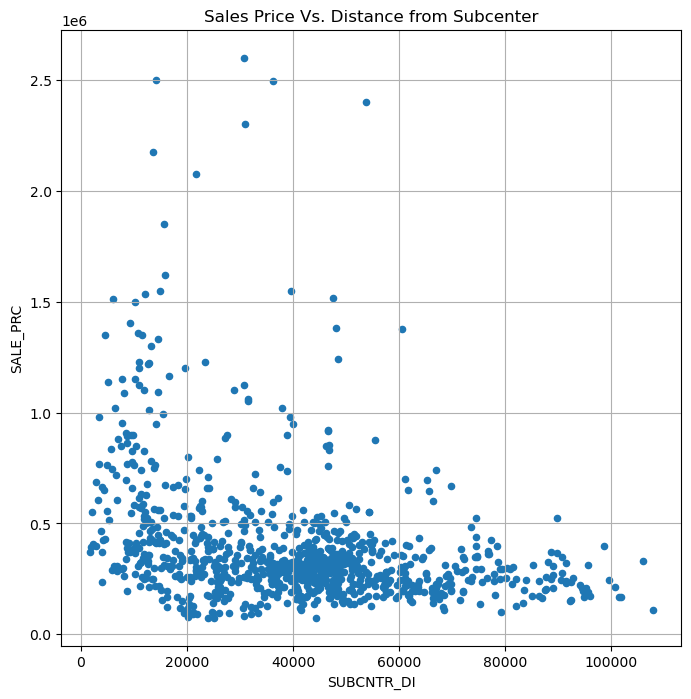

In [7]:
# sale price vs. distance from subcenter

api_miami_df.plot(kind="scatter", x="SUBCNTR_DI", y="SALE_PRC", grid=True, figsize=(8,8),
              title="Sales Price Vs. Distance from Subcenter")
plt.show()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(api_miami_df["SUBCNTR_DI"], api_miami_df["SALE_PRC"])
print(rvalue)

## Sales Price vs. Distance from Sub-center

Alernate hypothesis: the closer from the subcenter, the higher the sales price.
Null hypothesis: the further from the subcenter, the higher the sales price.

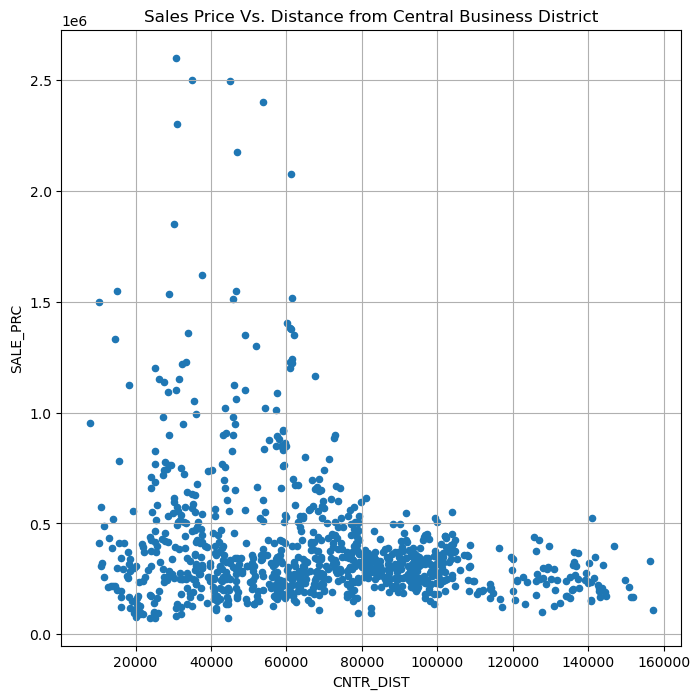

In [8]:
# sale price vs. distance from central business district

api_miami_df.plot(kind="scatter", x="CNTR_DIST", y="SALE_PRC", grid=True, figsize=(8,8),
              title="Sales Price Vs. Distance from Central Business District")
plt.show()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(api_miami_df["CNTR_DIST"], api_miami_df["SALE_PRC"])
print(rvalue)

## Sales Price vs. Distance from Central Business Center (CBD)

Alernate hypothesis: the closer from the CBD, the higher the sales price.
Null hypothesis: the further from the CBD, the higher the sales price.

In [ ]:
# sale price vs. airplane noise
# most of the values are 0, maybe we can skip this 